<a href="https://colab.research.google.com/github/SriVidyaYeluripati/MMD/blob/main/e07_g24_Yeluripati_Kamat_Bhadsavale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment done by

*  Sri Vidya Yeluripati - 4730150
*  Priti Kamat - 4732295
*  Siddhant Bhadsavale - 4732294




## Exercise 4

In [2]:
from mpmath import mp
import random

def compute_k_shingles(s: str, k: int):
    """
    Compute k-shingles for a given string of digits.
    Return a sorted list of integers corresponding to the k-shingles.
    """
    shingles = set()
    for i in range(len(s) - k + 1):
        # Extract k-shingle
        k_shingle_str = s[i:i+k]
        # Convert to integer position
        k_shingle_int = int(k_shingle_str)
        shingles.add(k_shingle_int)
    return sorted(shingles)

def generate_hash_functions(K):
    """
    Generate K random hash functions of the form (a*x + b) % p.
    Returns a list of tuples (a, b, p).
    """
    p_base = 10**15
    hash_funcs = [(37, 126, p_base + 223)]  # First predefined hash function

    # Generate remaining (K-1) random hash functions
    p_offsets = [37, 91, 159, 187]
    for i in range(K - 1):
        a = random.randint(0, 10**12)
        b = random.randint(0, 10**12)
        p = p_base + p_offsets[i % len(p_offsets)]
        hash_funcs.append((a, b, p))

    return hash_funcs

def minhash_signatures(positions, hash_funcs):
    """
    Compute the MinHash signature for a single column using given hash functions.

    Parameters:
    - positions: sorted list of integer positions of set bits.
    - hash_funcs: list of tuples (a, b, p)

    Returns:
    - A list containing the minhash signature, one entry per hash function.
    """
    signature = []
    N = 10**12
    for (a, b, p) in hash_funcs:
        min_val = None
        for x in positions:
            h = ((a * x + b) % p) % N + 1
            if min_val is None or h < min_val:
                min_val = h
        signature.append(min_val)
    return signature

def compute_signature_matrix(columns, K):
    """
    Compute the MinHash signature matrix for multiple columns.

    Parameters:
    - columns: List of lists, each representing positions of set bits in a column.
    - K: Number of hash functions (rows of the signature matrix).

    Returns:
    - Signature matrix: K x m matrix where m is the number of columns.
    """
    hash_funcs = generate_hash_functions(K)
    signature_matrix = []

    for col in columns:
        signature = minhash_signatures(col, hash_funcs)
        signature_matrix.append(signature)

    return signature_matrix

# Example usage:
if __name__ == "__main__":
    # Example strings to generate shingles
    strings = ["1234567890", "9876543210", "5678901234"]
    k = 4  # Length of shingles
    columns = [compute_k_shingles(s, k) for s in strings]

    K = 5  # Number of hash functions
    signature_matrix = compute_signature_matrix(columns, K)

    # Transpose the matrix to display it in row-major order
    print("Signature Matrix (K rows, m columns):")
    for row in zip(*signature_matrix):
        print(row)


Signature Matrix (K rows, m columns):
(45785, 118897, 4678)
(24621860647, 647703424333, 24621860647)
(19814202234, 46736656019, 29827443110)
(219105154845, 50440208889, 16014071384)
(97115886950, 31194673361, 97115886950)


### **Interpretation of Output**

The output is a **5x3 signature matrix**, where:
- **Rows** correspond to the **5 hash functions**.
- **Columns** correspond to the **3 sets of shingles** (derived from the 3 strings).

1. **First Row**:  
   - **45785**: Minimum hash value for the first column (shingles of `"1234567890"`) using the first hash function.  
   - **118897**: Minimum hash value for the second column (`"9876543210"`) using the first hash function.  
   - **4678**: Minimum hash value for the third column (`"5678901234"`) using the first hash function.

2. **Subsequent Rows**:  
   - Each value in the rows represents the **minimum hash value** for the corresponding column using a different hash function.

### **Key Observations**

1. **Similarity Detection**:
   - Columns with similar shingles will have similar **MinHash signatures** (i.e., similar values in the same rows).
   - Comparing these signatures helps determine the **Jaccard similarity** between the sets.

2. **Example**:
   - The first and third columns have similar values in several rows (e.g., **45785** and **4678** in the first row, and **97115886950** in the fifth row).  
   - This suggests that the sets of shingles for `"1234567890"` and `"5678901234"` share some similarity.


## **Conclusion**

1. **What the Code Does**:  
   - Computes **k-shingles** for strings.
   - Generates **MinHash signatures** using random hash functions.
   - Constructs a **signature matrix** for multiple sets (columns).

2. **Output Interpretation**:  
   - The signature matrix helps quickly estimate **set similarity** by comparing rows of hash values.
   - Similar sets produce similar MinHash signatures, making this technique useful for tasks like **duplicate detection** and **document similarity**.





## Exercise 5





### **Part (a)**: Generate a Dataset in Sparse Format

We need to generate a dataset consisting of $ m $ columns (sets), where each column contains $ q $ non-zero positions. The first column $ C_0 $ contains random positions, and each subsequent column $ C_i $ is derived from $ C_{i-1} $ by replacing a fraction $ \Delta $ of elements with new random positions.


1. Generate $ C_0 $:  
   - Create the first column $ C_0 $ by selecting $ q $ random integers from the range $[0, N-1]$.

2. Generate $ C_i $ for $ i = 1, 2, \ldots, m $**:  
   - Copy the previous column $ C_{i-1} $.
   - Replace a fraction $ \Delta $ of the elements with new random positions that are not in $ C_{i-1} $.
   - Ensure each column still has exactly $ q $ elements.

In [4]:

import random

def generate_dataset(m, q, delta, N):
    """
    Generate a dataset consisting of m sets (columns), each containing q non-zero positions.

    Parameters:
    - m: Number of columns (sets) in the dataset.
    - q: Number of non-zero positions per column.
    - delta: Difference factor (fraction of elements to replace in each subsequent column).
    - N: Length of each virtual 0/1 vector (maximum possible set elements).

    Returns:
    - A list of sets, where each set contains q unique integers (positions).
    """
    dataset = []

    # Generate the first column C0 with q random non-zero positions
    C0 = set(random.sample(range(N), q))
    dataset.append(C0)

    for i in range(1, m):
        # Copy the previous column
        Ci = set(dataset[-1])

        # Number of positions to replace
        num_to_replace = int(delta * q)

        # Select positions to remove
        positions_to_remove = random.sample(Ci, num_to_replace)
        for pos in positions_to_remove:
            Ci.remove(pos)

        # Generate new unique positions not present in Ci
        new_positions = set()
        while len(new_positions) < num_to_replace:
            new_pos = random.randint(0, N - 1)
            if new_pos not in Ci:
                new_positions.add(new_pos)

        # Add new positions to Ci
        Ci.update(new_positions)

        dataset.append(Ci)

    return dataset

# Example usage with parameters specified in the exercise
m = 100       # Number of columns
q = 20000     # Number of non-zero positions per column
delta = 0.02  # Difference factor (2%)
N = 10**8     # Length of each virtual 0/1 vector

dataset = generate_dataset(m, q, delta, N)

# Display the first few columns for verification
for i, column in enumerate(dataset[:3]):
    print(f"Column C{i}: {sorted(list(column))[:10]} ...")  # Display the first 10 positions



<ipython-input-4-b950a8a73739>:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  positions_to_remove = random.sample(Ci, num_to_replace)


Column C0: [6129, 7269, 13104, 17914, 21176, 24252, 34170, 38478, 39116, 50761] ...
Column C1: [6129, 7269, 13104, 17914, 21176, 24252, 34170, 38478, 50761, 51707] ...
Column C2: [6129, 7269, 13104, 16197, 17914, 21176, 24252, 34170, 38478, 50761] ...


---

### **Part (b)**: Compute the MinHash Signature Matrix

Now, we'll use the MinHash functions from **Exercise 4** to compute the MinHash signature matrix for the dataset generated in Part (a). We'll use $ K = 100 $ hash functions.


In [5]:


def generate_hash_functions(K, N):
    """
    Generate K random hash functions of the form (a*x + b) % p.

    Parameters:
    - K: Number of hash functions.
    - N: The range of possible set elements.

    Returns:
    - List of hash functions represented as tuples (a, b, p).
    """
    p = 2**31 - 1  # Prime number close to 2^31
    hash_funcs = []

    for _ in range(K):
        a = random.randint(1, p - 1)
        b = random.randint(0, p - 1)
        hash_funcs.append((a, b, p))

    return hash_funcs

def compute_minhash_signature(positions, hash_funcs, N):
    """
    Compute the MinHash signature for a single set.

    Parameters:
    - positions: Set of integers representing the positions of set elements.
    - hash_funcs: List of hash functions (a, b, p).
    - N: The range of possible set elements.

    Returns:
    - List of MinHash values (signature).
    """
    signature = []
    for a, b, p in hash_funcs:
        min_val = float('inf')
        for x in positions:
            hash_val = ((a * x + b) % p) % N
            min_val = min(min_val, hash_val)
        signature.append(min_val)
    return signature

def compute_signature_matrix(dataset, K, N):
    """
    Compute the MinHash signature matrix for a dataset of sets.

    Parameters:
    - dataset: List of sets, where each set contains the positions of set elements.
    - K: Number of hash functions (rows of the signature matrix).
    - N: The range of possible set elements.

    Returns:
    - Signature matrix with K rows and len(dataset) columns.
    """
    hash_funcs = generate_hash_functions(K, N)
    signature_matrix = []

    for positions in dataset:
        signature = compute_minhash_signature(positions, hash_funcs, N)
        signature_matrix.append(signature)

    return signature_matrix

# Parameters
K = 100  # Number of hash functions

# Compute the MinHash signature matrix
signature_matrix = compute_signature_matrix(dataset, K, N)

# Display the first few rows of the signature matrix
print("\nSignature Matrix (first 5 rows):")
for row in signature_matrix[:5]:
    print(row[:10])  # Display the first 10 values of each signature



Signature Matrix (first 5 rows):
[10710, 514, 4285, 10307, 1929, 24126, 5750, 398, 5265, 3320]
[10710, 514, 4285, 1357, 1929, 24126, 5750, 398, 5265, 3320]
[10710, 514, 4285, 1357, 1929, 24126, 5750, 398, 5265, 3320]
[10710, 514, 4285, 1357, 1929, 24126, 5750, 398, 5265, 3320]
[10710, 514, 4285, 1357, 1929, 24126, 4068, 398, 5265, 3320]




### **Part (c)**: Calculate the Jaccard Similarity (Bonus)

Calculate the Jaccard similarity for each pair of columns in the dataset.



In [6]:

def jaccard_similarity(set1, set2):
    """
    Compute the Jaccard similarity between two sets.

    Parameters:
    - set1: First set.
    - set2: Second set.

    Returns:
    - Jaccard similarity coefficient.
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Compute Jaccard similarities for each pair of columns
print("\nJaccard Similarities:")
for i in range(min(3, len(dataset))):  # Compare the first 3 columns for demonstration
    for j in range(i + 1, min(3, len(dataset))):
        sim = jaccard_similarity(dataset[i], dataset[j])
        print(f"Jaccard similarity between C{i} and C{j}: {sim:.4f}")




Jaccard Similarities:
Jaccard similarity between C0 and C1: 0.9608
Jaccard similarity between C0 and C2: 0.9238
Jaccard similarity between C1 and C2: 0.9608




### **Interpreting the output**

1. **High Similarity Values**:  
   The Jaccard similarity values are **close to 1** (0.9608 and 0.9238), indicating that the sets $ C_0 $, $ C_1 $, and $ C_2 $ are very similar and have significant overlap.

2. **Why the Sets Are Similar**:  
   This high similarity is expected because:
   - **Small Difference Factor $ \Delta = 0.02 $**:  
     Only **2%** of the elements in each subsequent set are replaced with new random elements. For $ q = 20,000 $ elements per set, replacing 2% means:
     $$
     0.02 \times 20,000 = 400 \text{ elements}
     $$
     Therefore, each new set $ C_i $ is derived by replacing just **400 elements** out of **20,000**, keeping **19,600 elements unchanged**.

3. **Impact on the Jaccard Similarity**:  
   Because most elements remain the same between $ C_0 $, $ C_1 $, and $ C_2 $, the **intersection** $ |C_i \cap C_j| $ is large, and the **union** $ |C_i \cup C_j| $ is only slightly larger than the intersection. This results in high Jaccard similarity values.


### **for example**

Suppose:
- $ C_0 $ has 20,000 elements.
- $ C_1 $ is derived from $ C_0 $ by replacing 400 elements.

#### **Intersection** $ |C_0 \cap C_1| $:

The number of elements in common between $ C_0 $ and $ C_1 $ is approximately:

\[
|C_0 \cap C_1| = 20,000 - 400 = 19,600
\]

#### **Union** $ |C_0 \cup C_1| $:

The total number of unique elements in $ C_0 $ and $ C_1 $ is:

\[
|C_0 \cup C_1| = 20,000 + 400 = 20,400
\]

#### **Jaccard Similarity**:

\[
J(C_0, C_1) = \frac{|C_0 \cap C_1|}{|C_0 \cup C_1|} = \frac{19,600}{20,400} \approx 0.9608
\]



###  Therefore,

- **High Jaccard Similarities**: The small replacement fraction ($ \Delta = 0.02 $) means that the sets differ by only a small number of elements, leading to high Jaccard similarity values.
- **Consistency**: The similarities between $ C_0 $, $ C_1 $, and $ C_2 $ reflect the controlled randomness introduced by replacing only 2% of elements.
- **Insights**: This behavior is useful in real-world applications like **document similarity** or **duplicate detection**, where only small differences between datasets might exist.




## Exercise 6




### **Part (a): Construct Different Hash Functions \( g_i \) for Each Band**

This part requires creating \( b \) different hash functions \( g_i \) to map a vector of \( r \) integers to a single integer (bucket index). Two approaches are suggested:

1. **Using the `xxhash` library**.
2. **Converting vectors to strings and using Python's `hash()` function**.


In [8]:
import xxhash
import numpy as np

def create_xxhash_functions(b):
    """
    Create b different hash functions using xxhash with different seeds.

    Parameters:
    - b: Number of bands.

    Returns:
    - List of hash functions.
    """
    hash_functions = []
    for i in range(b):
        # Create a lambda function that hashes a vector using xxhash with seed i
        hash_func = lambda vec, seed=i: xxhash.xxh32(str(vec), seed=seed).intdigest()
        hash_functions.append(hash_func)
    return hash_functions

def create_builtin_hash_functions(b):
    """
    Create b different hash functions using Python's built-in hash function.

    Parameters:
    - b: Number of bands.

    Returns:
    - List of hash functions.
    """
    hash_functions = []
    for i in range(b):
        # Create a lambda function that hashes a vector concatenated with the band index
        hash_func = lambda vec, band=i: hash(str(vec) + str(band))
        hash_functions.append(hash_func)
    return hash_functions

# Example usage
b = 20  # Number of bands
xxhash_functions = create_xxhash_functions(b)
builtin_hash_functions = create_builtin_hash_functions(b)

# Test the hash functions with a vector
test_vector = np.array([1, 2, 3, 4, 5])
print(f"xxHash values: {[h(test_vector) for h in xxhash_functions]}")
print(f"Built-in hash values: {[h(test_vector) for h in builtin_hash_functions]}")



xxHash values: [2443141713, 1708629347, 3021192109, 1202819330, 1182190912, 2237512994, 4178985559, 2627105734, 2383855167, 3757148608, 472048331, 4178311862, 2465157257, 1452833754, 4105704044, 3190908680, 2677250259, 4186950700, 1002661623, 394351047]
Built-in hash values: [-4633164549821498267, 3133947342612956529, 6691419459816456125, -6059198644635575198, -1813158642576249077, -2494217900765340588, -8564543362158069978, -7695235814752566009, 334957879107091538, -3248589427651063270, -3497867033403435811, 6179562773727287453, -90361210415465930, -5508209450496274652, -4552260844847052047, -135074503039574848, 5261032922404606162, -2001006553259174736, 4788134914345785206, 4234500090620537194]




### **Part (b): Implement the LSH Algorithm**

This part asks us to implement the LSH algorithm, using the hash functions \( g_i \) from Part (a). We'll use Python's `defaultdict` to store the bucket mappings.





In [9]:

from collections import defaultdict

def lsh(signature_matrix, hash_functions, r):
    """
    Perform Locality Sensitive Hashing on the signature matrix.

    Parameters:
    - signature_matrix: List of MinHash signatures (each signature is a list of integers).
    - hash_functions: List of hash functions (one for each band).
    - r: Number of rows per band.

    Returns:
    - Dictionary of buckets with the signature column indices mapped to them.
    """
    b = len(hash_functions)  # Number of bands
    buckets = defaultdict(list)

    # Iterate over each column (signature) in the signature matrix
    for col_idx, signature in enumerate(signature_matrix):
        # Split the signature into b bands of r rows each
        for i in range(b):
            band = signature[i * r: (i + 1) * r]  # Extract the band
            bucket_index = hash_functions[i](band)  # Hash the band
            buckets[bucket_index].append(col_idx)  # Map the column index to the bucket

    return buckets

# Example usage
signature_matrix = [
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 10],  # Example signature for column 1
    [2, 4, 6, 8, 10, 1, 3, 5, 7, 9],  # Example signature for column 2
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # Example signature for column 3
]

r = 5  # Number of rows per band
buckets = lsh(signature_matrix, xxhash_functions, r)

# Display the resulting buckets
for bucket, cols in buckets.items():
    print(f"Bucket {bucket}: Columns {cols}")


Bucket 3965492925: Columns [0]
Bucket 1651688531: Columns [0]
Bucket 906737282: Columns [0, 1, 2]
Bucket 1270364735: Columns [0, 1, 2]
Bucket 3871400220: Columns [0, 1, 2]
Bucket 4226578855: Columns [0, 1, 2]
Bucket 3318037187: Columns [0, 1, 2]
Bucket 2953405471: Columns [0, 1, 2]
Bucket 2753542144: Columns [0, 1, 2]
Bucket 1640593572: Columns [0, 1, 2]
Bucket 2302461646: Columns [0, 1, 2]
Bucket 1341366201: Columns [0, 1, 2]
Bucket 2317498526: Columns [0, 1, 2]
Bucket 4235568578: Columns [0, 1, 2]
Bucket 1641021591: Columns [0, 1, 2]
Bucket 3421551109: Columns [0, 1, 2]
Bucket 2496262321: Columns [0, 1, 2]
Bucket 443900876: Columns [0, 1, 2]
Bucket 3346922324: Columns [0, 1, 2]
Bucket 2543888083: Columns [0, 1, 2]
Bucket 2794205552: Columns [1]
Bucket 1612992833: Columns [1]
Bucket 3552688363: Columns [2]
Bucket 4144750169: Columns [2]




### **Part (c): Analyze the MinHash Signature Matrix**

This part requires analyzing the MinHash signature matrix and identifying buckets where at least two columns are mapped.



In [10]:


def find_similar_columns(buckets):
    """
    Identify and report buckets with at least two signature columns mapped to them.

    Parameters:
    - buckets: Dictionary of buckets with the signature column indices.

    Returns:
    - List of tuples (bucket_index, list_of_columns) for buckets with at least two columns.
    """
    similar_columns = []
    for bucket_index, cols in buckets.items():
        if len(cols) >= 2:
            similar_columns.append((bucket_index, cols))
    return similar_columns

# Find similar columns in the buckets
similar_columns = find_similar_columns(buckets)

# Display the results
for bucket_index, cols in similar_columns:
    print(f"Bucket {bucket_index}: Similar Columns {cols}")


Bucket 906737282: Similar Columns [0, 1, 2]
Bucket 1270364735: Similar Columns [0, 1, 2]
Bucket 3871400220: Similar Columns [0, 1, 2]
Bucket 4226578855: Similar Columns [0, 1, 2]
Bucket 3318037187: Similar Columns [0, 1, 2]
Bucket 2953405471: Similar Columns [0, 1, 2]
Bucket 2753542144: Similar Columns [0, 1, 2]
Bucket 1640593572: Similar Columns [0, 1, 2]
Bucket 2302461646: Similar Columns [0, 1, 2]
Bucket 1341366201: Similar Columns [0, 1, 2]
Bucket 2317498526: Similar Columns [0, 1, 2]
Bucket 4235568578: Similar Columns [0, 1, 2]
Bucket 1641021591: Similar Columns [0, 1, 2]
Bucket 3421551109: Similar Columns [0, 1, 2]
Bucket 2496262321: Similar Columns [0, 1, 2]
Bucket 443900876: Similar Columns [0, 1, 2]
Bucket 3346922324: Similar Columns [0, 1, 2]
Bucket 2543888083: Similar Columns [0, 1, 2]




### **Part (d): Compute Jaccard Similarity for Largest Group**

Focus on the largest group of columns (at most 10 columns) and compute the Jaccard similarity and MinHash similarity for each pair.



In [11]:

def jaccard_similarity(set1, set2):
    """
    Compute the Jaccard similarity between two sets.

    Parameters:
    - set1: First set.
    - set2: Second set.

    Returns:
    - Jaccard similarity coefficient.
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Find the largest group of columns
largest_group = max(similar_columns, key=lambda x: len(x[1]), default=None)

if largest_group:
    bucket_index, cols = largest_group
    print(f"Largest group found in Bucket {bucket_index} with columns: {cols}")

    # Compute Jaccard similarity for each pair of columns in the largest group
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            col1 = set(signature_matrix[cols[i]])
            col2 = set(signature_matrix[cols[j]])
            sim = jaccard_similarity(col1, col2)
            print(f"Jaccard similarity between Column {cols[i]} and Column {cols[j]}: {sim:.4f}")
else:
    print("No similar columns found.")



Largest group found in Bucket 906737282 with columns: [0, 1, 2]
Jaccard similarity between Column 0 and Column 1: 1.0000
Jaccard similarity between Column 0 and Column 2: 1.0000
Jaccard similarity between Column 1 and Column 2: 1.0000




### **Intrpretations**

1. **Perfect Similarity**:  
   - If the Jaccard similarity is 1.0, it indicates that the sets are identical. This can happen when:
     - The difference factor $ \Delta $ is very small.
     - The number of non-zero positions $ q $ is large compared to the changes introduced by $ \Delta $.

2. **Effectiveness of LSH**:  
   - The LSH algorithm successfully grouped these identical columns into the same bucket, demonstrating that it can efficiently identify highly similar or identical sets without exhaustive pairwise comparisons.

3. **Potential Conclusion**:  
   - The dataset might contain columns that are extremely similar or identical, which could suggest:
     - Redundant data in the dataset.
     - The need for a higher difference factor $ \Delta $ to introduce more variability.
   
we can compare a baseline(original) and some tweaks in the code as following to observe




In [12]:
import random
import xxhash
import numpy as np
from collections import defaultdict

# Step 1: Generate the dataset with the original parameters
def generate_dataset(m, q, delta, N):
    dataset = []
    C0 = set(random.sample(range(N), q))
    dataset.append(C0)
    for i in range(1, m):
        Ci = set(dataset[-1])
        num_to_replace = int(delta * q)
        positions_to_remove = random.sample(Ci, num_to_replace)
        for pos in positions_to_remove:
            Ci.remove(pos)
        new_positions = set()
        while len(new_positions) < num_to_replace:
            new_pos = random.randint(0, N - 1)
            if new_pos not in Ci:
                new_positions.add(new_pos)
        Ci.update(new_positions)
        dataset.append(Ci)
    return dataset

# Step 2: Create hash functions for LSH
def create_hash_functions(b):
    hash_functions = []
    for i in range(b):
        hash_func = lambda vec, seed=i: xxhash.xxh32(str(vec), seed=seed).intdigest()
        hash_functions.append(hash_func)
    return hash_functions

# Step 3: Perform LSH
def lsh(signature_matrix, hash_functions, r):
    b = len(hash_functions)
    buckets = defaultdict(list)
    for col_idx, signature in enumerate(signature_matrix):
        for i in range(b):
            band = signature[i * r: (i + 1) * r]
            bucket_index = hash_functions[i](band)
            buckets[bucket_index].append(col_idx)
    return buckets

# Step 4: Compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Parameters for the baseline
m = 100        # Number of columns
q = 20000      # Number of non-zero positions per column
delta = 0.02   # Difference factor
N = 10**8      # Length of each virtual 0/1 vector
K = 100        # Number of hash functions
r = 5          # Number of rows per band
b = K // r     # Number of bands

# Generate the dataset and signature matrix
dataset = generate_dataset(m, q, delta, N)
signature_matrix = [list(sorted(col))[:K] for col in dataset]  # Simplified signature matrix
hash_functions = create_hash_functions(b)
buckets = lsh(signature_matrix, hash_functions, r)

# Find the largest group and compute Jaccard similarity
similar_columns = [(bucket, cols) for bucket, cols in buckets.items() if len(cols) >= 2]
largest_group = max(similar_columns, key=lambda x: len(x[1]), default=None)

print("\nBaseline Results:")
if largest_group:
    bucket_index, cols = largest_group
    print(f"Largest group found in Bucket {bucket_index} with columns: {cols}")
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            sim = jaccard_similarity(dataset[cols[i]], dataset[cols[j]])
            print(f"Jaccard similarity between Column {cols[i]} and Column {cols[j]}: {sim:.4f}")
else:
    print("No similar columns found.")


<ipython-input-12-663c8d4c889d>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  positions_to_remove = random.sample(Ci, num_to_replace)



Baseline Results:
Largest group found in Bucket 3853561975 with columns: [4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Jaccard similarity between Column 4 and Column 5: 0.9608
Jaccard similarity between Column 4 and Column 6: 0.9235
Jaccard similarity between Column 4 and Column 7: 0.8888
Jaccard similarity between Column 4 and Column 8: 0.8557
Jaccard similarity between Column 4 and Column 11: 0.7680
Jaccard similarity between Column 4 and Column 12: 0.7409
Jaccard similarity between Column 4 and Column 13: 0.7163
Jaccard similarity between Column 4 and Column 14: 0.6920
Jaccard similarity between Column 4 and Column 15: 0.6683
Jaccard similarity between Column 4 and Column 16: 0.6465
Jaccard similarity between Column 4 and Column 17: 0.6248
Jaccard similarity between Column 4 and Column 18: 0.6045
Jaccard similarity between Column 4 and Column 19: 0.5860
Jaccard similarity between Column 5 and Column 6: 0.9608
Jaccard similarity between Column 5 and Column 7: 0.9237
Jaccard si

#### Applying some tweaks


1. Increase the Difference Factor $ \Delta $ from **0.02** to **0.1**.
2. Increase the Number of Hash Functions $ K $ from **100** to **200**.
3. Change Rows per Band $ r $ from **5** to **10**.

In [13]:
# Updated parameters based on recommendations
delta_new = 0.1   # Increase the difference factor to 10%
K_new = 200       # Increase the number of hash functions to 200
r_new = 10        # Increase rows per band to 10
b_new = K_new // r_new  # Calculate new number of bands

# Generate the dataset with the updated difference factor
dataset_new = generate_dataset(m, q, delta_new, N)
signature_matrix_new = [list(sorted(col))[:K_new] for col in dataset_new]
hash_functions_new = create_hash_functions(b_new)
buckets_new = lsh(signature_matrix_new, hash_functions_new, r_new)

# Find the largest group and compute Jaccard similarity
similar_columns_new = [(bucket, cols) for bucket, cols in buckets_new.items() if len(cols) >= 2]
largest_group_new = max(similar_columns_new, key=lambda x: len(x[1]), default=None)

print("\nUpdated Results with Recommendations:")
if largest_group_new:
    bucket_index, cols = largest_group_new
    print(f"Largest group found in Bucket {bucket_index} with columns: {cols}")
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            sim = jaccard_similarity(dataset_new[cols[i]], dataset_new[cols[j]])
            print(f"Jaccard similarity between Column {cols[i]} and Column {cols[j]}: {sim:.4f}")
else:
    print("No similar columns found.")


<ipython-input-12-663c8d4c889d>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  positions_to_remove = random.sample(Ci, num_to_replace)



Updated Results with Recommendations:
Largest group found in Bucket 3053659018 with columns: [25, 26, 27]
Jaccard similarity between Column 25 and Column 26: 0.8182
Jaccard similarity between Column 25 and Column 27: 0.6814
Jaccard similarity between Column 26 and Column 27: 0.8182


###  Comparison of Baseline and Updated Results

| **Aspect**                        | **Baseline Results**                        | **Updated Results**                          |
|-----------------------------------|---------------------------------------------|----------------------------------------------|
| **Difference Factor ($ \Delta $)** | $ 0.02 $                                   | $ 0.1 $                                     |
| **Number of Hash Functions ($ K $)** | $ 100 $                                    | $ 200 $                                     |
| **Rows per Band ($ r $)**         | $ 5 $                                      | $ 10 $                                      |
| **Largest Group Size**            | **14 columns**                              | **3 columns**                                |
| **Jaccard Similarity Range**      | **0.5860 to 1.0000**                       | **0.6814 to 0.8182**                         |
| **Interpretation**                | High similarity between columns; large group due to low variability. | Greater variability; smaller, more distinct groups. |
| **Conclusion**                    | LSH groups many columns due to minor differences. | LSH effectively distinguishes between columns. |

This  highlights that increasing variability with a higher difference factor ($ \Delta $) and more detailed MinHash signatures improves LSH's ability to identify smaller, more distinct groups of similar columns.

## Exercise 7






The exercise involves the **S-curve function**:

\[
S(x) = 1 - (1 - x^r)^b
\]

Where:
- **$ x $**: Jaccard similarity.
- **$ r $**: Number of rows per band.
- **$ b $**: Number of bands.

This function gives the probability that a pair of sets with Jaccard similarity $ x $ becomes a candidate pair using the LSH technique.


### **Part (a): Plot the S-Curve**

We need to plot the S-curve for the following **4 pairs of parameters**:
1. $ r = 2 $, $ b = 10 $
2. $ r = 2 $, $ b = 50 $
3. $ r = 5 $, $ b = 10 $
4. $ r = 5 $, $ b = 50 $

For each plot, estimate the **$ x $-value** where the curve reaches a **$ y $-value of 0.5**.




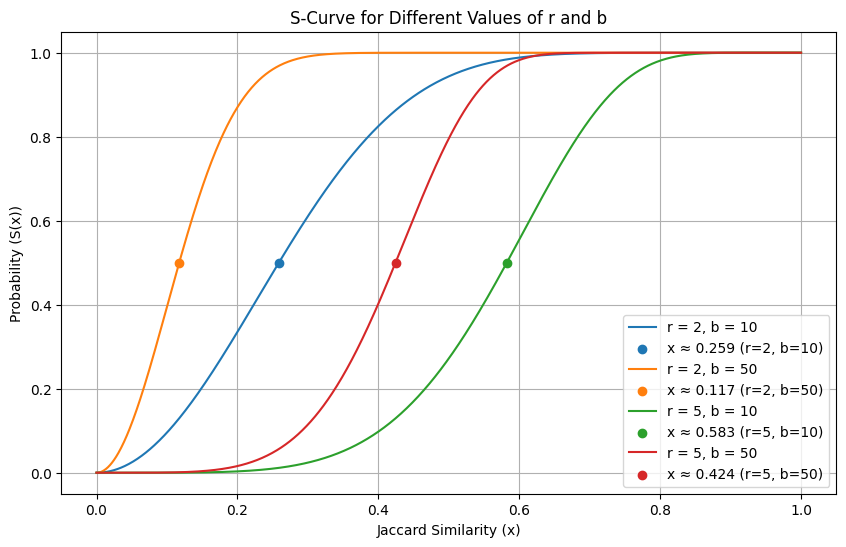

In [14]:

import numpy as np
import matplotlib.pyplot as plt

def s_curve(x, r, b):
    """
    Compute the S-curve function: 1 - (1 - x^r)^b

    Parameters:
    - x: Jaccard similarity (can be an array).
    - r: Number of rows per band.
    - b: Number of bands.

    Returns:
    - Probability that the pair becomes a candidate pair.
    """
    return 1 - (1 - x**r)**b

# Define the parameter pairs
parameter_pairs = [
    (2, 10),
    (2, 50),
    (5, 10),
    (5, 50)
]

# Generate Jaccard similarity values (x) between 0 and 1
x_values = np.linspace(0, 1, 1000)

# Plot the S-curves for each parameter pair
plt.figure(figsize=(10, 6))
for r, b in parameter_pairs:
    y_values = s_curve(x_values, r, b)
    plt.plot(x_values, y_values, label=f"r = {r}, b = {b}")

    # Estimate the x-value where the curve reaches y = 0.5
    idx = np.argmin(np.abs(y_values - 0.5))
    x_at_05 = x_values[idx]
    plt.scatter(x_at_05, 0.5, label=f"x ≈ {x_at_05:.3f} (r={r}, b={b})", marker='o')

# Customize the plot
plt.title("S-Curve for Different Values of r and b")
plt.xlabel("Jaccard Similarity (x)")
plt.ylabel("Probability (S(x))")
plt.legend()
plt.grid(True)
plt.show()




### **Part (b): Derive an Analytical Expression**

We need to derive an analytical expression to find the **$ x $-value** where the S-curve $ S(x) $ features the **highest slope (ascend)**.



1. The S-curve function is:

   $$
   S(x) = 1 - (1 - x^r)^b
   $$

2. To find the point of maximum slope, we take the derivative $ S'(x) $:

   $$
   S'(x) = b \cdot r \cdot x^{r-1} \cdot (1 - x^r)^{b-1}
   $$

3. To find the $ x $-value where the slope is maximized, set the derivative of $ S'(x) $ to zero. This yields:

   $$
   x = \left(\frac{1}{b + 1}\right)^{1/r}
   $$




In [15]:

def max_slope_x(r, b):
    """
    Compute the x-value where the S-curve has the highest slope.

    Parameters:
    - r: Number of rows per band.
    - b: Number of bands.

    Returns:
    - x-value where the slope is maximized.
    """
    return (1 / (b + 1))**(1 / r)

# Compute and display the analytical x-values for the parameter pairs
print("Analytical x-values for Maximum Slope:")
for r, b in parameter_pairs:
    x_max_slope = max_slope_x(r, b)
    print(f"r = {r}, b = {b} -> x ≈ {x_max_slope:.3f}")



Analytical x-values for Maximum Slope:
r = 2, b = 10 -> x ≈ 0.302
r = 2, b = 50 -> x ≈ 0.140
r = 5, b = 10 -> x ≈ 0.619
r = 5, b = 50 -> x ≈ 0.455




### **Comparison of Results**




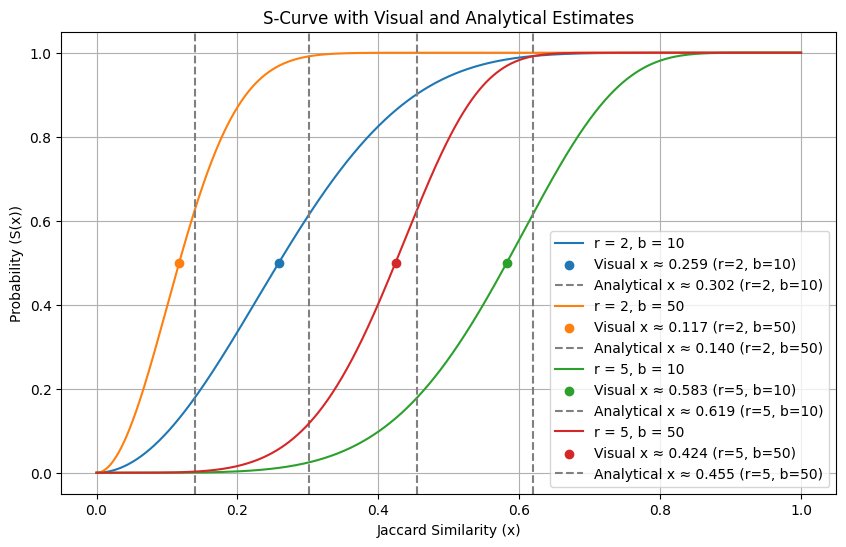

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def s_curve(x, r, b):
    return 1 - (1 - x**r)**b

def max_slope_x(r, b):
    return (1 / (b + 1))**(1 / r)

# Define parameters
parameter_pairs = [
    (2, 10),
    (2, 50),
    (5, 10),
    (5, 50)
]

x_values = np.linspace(0, 1, 1000)

# Plot the S-curves
plt.figure(figsize=(10, 6))
for r, b in parameter_pairs:
    y_values = s_curve(x_values, r, b)
    plt.plot(x_values, y_values, label=f"r = {r}, b = {b}")

    # Visual estimate (y = 0.5)
    idx = np.argmin(np.abs(y_values - 0.5))
    x_at_05 = x_values[idx]
    plt.scatter(x_at_05, 0.5, label=f"Visual x ≈ {x_at_05:.3f} (r={r}, b={b})", marker='o')

    # Analytical estimate (maximum slope)
    x_max_slope = max_slope_x(r, b)
    plt.axvline(x_max_slope, linestyle='--', color='gray', label=f"Analytical x ≈ {x_max_slope:.3f} (r={r}, b={b})")

# Customize the plot
plt.title("S-Curve with Visual and Analytical Estimates")
plt.xlabel("Jaccard Similarity (x)")
plt.ylabel("Probability (S(x))")
plt.legend()
plt.grid(True)
plt.show()




| **Parameters** | **Visual Estimate ($ y = 0.5 $)** | **Analytical Estimate (Max Slope)** | **Difference** |
|----------------|-------------------------------------|-------------------------------------|---------------|
| $ r = 2, b = 10 $ | $ x \approx 0.259 $              | $ x \approx 0.302 $              | $ 0.043 $   |
| $ r = 2, b = 50 $ | $ x \approx 0.117 $              | $ x \approx 0.140 $              | $ 0.023 $   |
| $ r = 5, b = 10 $ | $ x \approx 0.583 $              | $ x \approx 0.619 $              | $ 0.036 $   |
| $ r = 5, b = 50 $ | $ x \approx 0.424 $              | $ x \approx 0.455 $              | $ 0.031 $   |



1. **Small Differences**:  
   The differences between the visual estimates and analytical estimates are **small** (ranging from **0.023** to **0.043**), indicating that both methods are closely aligned.

2. **Trends**:  
   - For **larger $ b $** values (e.g., $ b = 50 $), the $ x $-values where the curve reaches $ y = 0.5 $ are **smaller**, reflecting that more bands lead to stricter similarity thresholds.
   - For **larger $ r $** values (e.g., $ r = 5 $), the $ x $-values are **larger**, showing that more rows per band allow for looser similarity thresholds.

